# PROJECT: PHASE 4
### GROUP: 7

#### GROUP MEMBERS 
#### 1. EMMANUEL KIPLETING
#### 2. 
#### 3. 
#### 4. 
#### 5. 

###### DATE: 2ND DECEMBER 2025

## Importing libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

### Load the data

In [9]:

# Load the four core files
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")
movies = pd.read_csv("movies.csv")


### Merge the Data

In [5]:
# Merge ratings with movie titles and genres
ratings_with_movies = ratings.merge(movies, on="movieId", how="left")


# 1. Data Understanding

In [4]:
ratings_with_movies.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

### Overview of the Dataset

In [6]:
ratings_with_movies.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userId,100836.0,NaN,NaN,NaN,326.127564,182.618491,1.0,177.0,325.0,477.0,610.0
movieId,100836.0,NaN,NaN,NaN,19435.295718,35530.987199,1.0,1199.0,2991.0,8122.0,193609.0
rating,100836.0,NaN,NaN,NaN,3.501557,1.042529,0.5,3.0,3.5,4.0,5.0
timestamp,100836.0,NaN,NaN,NaN,1205946087.368469,216261035.995132,828124615.0,1019123866.0,1186086662.0,1435994144.5,1537799250.0
title,100836,9719,Forrest Gump (1994),329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,100836,951,Comedy,7196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identify Missing Values

In [7]:
ratings_with_movies.isna().sum().sort_values(ascending=False)

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

### Check Rating Distribution

<Axes: >

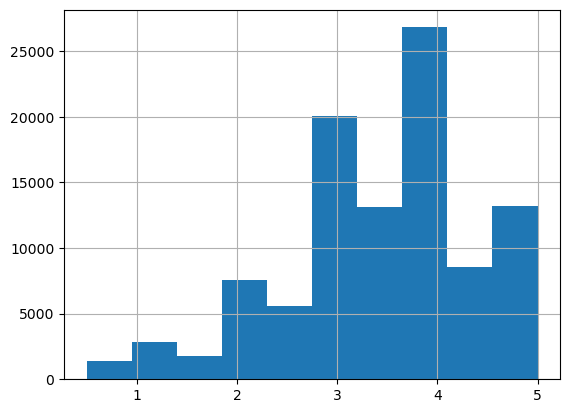

In [8]:
ratings['rating'].hist(bins=10)

### Count the Number of Ratings per movie

In [10]:
ratings.groupby('movieId').size().sort_values(ascending=False).head(10)


movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
dtype: int64

### Count the Number of Ratings per User

In [11]:
ratings.groupby('userId').size().sort_values(ascending=False).head(10)


userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
dtype: int64

### Collaborative Filtering (CF) using matrix factorization.

In [12]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare data for Surprise library
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
algo = SVD()
algo.fit(trainset)

# Evaluate
predictions = algo.test(testset)
print("RMSE:", accuracy.rmse(predictions))


RMSE: 0.8728
RMSE: 0.8728020904115548


### Generate Recommendations

In [13]:
def get_top_n(predictions, n=5):
    from collections import defaultdict
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n(predictions, n=5)

# Example: Top 5 recommendations for user 1
user_1_recs = top_n[1]
print(user_1_recs)


[(593, 4.979388197362154), (1208, 4.938352836602136), (1278, 4.782423419025656), (2005, 4.736060337844089), (2944, 4.710300484123305)]
